In [2]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import fma.utils
from keras.models import load_model
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.
/Users/diegoaguado/anaconda2/envs/music/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
from utils.evaluation import get_full_song_predictions
from utils.plotting import plot_confusion_matrix
from build_spectrograms import build_spectrograms

Read 8000 files


/Users/diegoaguado/Desktop/Music_Project/Music-Classification/fma/utils.py:213: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  'category', categories=SUBSETS, ordered=True)


# How to use this notebook.
The following notebook evaluates the 3 different datasets and plots the corresponding confusion matrix.

## Parameters
To evaluate your model, select the parameters to build the spectrograms with the corresponding shape while training your model and change the model path to load it.

In [4]:
windows_number = 10
hop_length = 366

small_dataset_spectrograms = build_spectrograms(windows_number, hop_length)


 Found spectrograms for hop_length 366 and windows 10


In [5]:
model_path = 'saved_models/hop_length_366_conv_64.h5'

In [6]:
my_model = load_model(model_path)

In [7]:
train_sequences, y_train_binary_sequences = small_dataset_spectrograms['train']                                                                    
val_sequences, y_val_binary_sequences = small_dataset_spectrograms['val']                                                                          
test_sequences, y_test_binary_sequences = small_dataset_spectrograms['test']                                                                       
del small_dataset_spectrograms

# Train dataset evaluation
## Evaluation of all windows

In [8]:
loss, accuracy = my_model.evaluate(train_sequences,                                                                                         
                                   y_train_binary_sequences)                                                                                                                                                                                               

print("\nLoss: {} ; Acc: {} on windowed test dataset ".format(loss, accuracy))

31904/31950 [============================>.] - ETA: 0s
Loss: 0.5318374171131618 ; Acc: 0.7996244131511366 on windowed test dataset 


## Evaluation averaging among windows

In [9]:
window_probabilities = my_model.predict(train_sequences)
y_train, predictions, accuracy = get_full_song_predictions(window_probabilities, y_train_binary_sequences)


Accuracy for full songs is 0.8447574334898279


Normalized confusion matrix
[[ 0.75093867  0.0738423   0.10763454  0.06758448]
 [ 0.01380176  0.94730238  0.00627353  0.03262233]
 [ 0.0525      0.015       0.77125     0.16125   ]
 [ 0.01001252  0.00876095  0.07133917  0.90988736]]


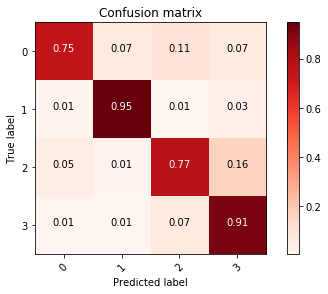

In [10]:
train_confmatrix = confusion_matrix((y_train), predictions)
plot_confusion_matrix(train_confmatrix, range(4), normalize=True)

# Validation dataset evaluation
## Evaluation of all windows

In [11]:
loss, accuracy = my_model.evaluate(val_sequences,                                                                                         
                                   y_val_binary_sequences)                                                                                                                                                                                               
       
print("\nLoss: {} ; Acc: {} on windowed test dataset ".format(loss, accuracy))

4000/4000 [==============================] - 3s     

Loss: 0.8773934267312288 ; Acc: 0.6995 on windowed test dataset 


## Evaluation averaging among windows

In [12]:
window_probabilities = my_model.predict(val_sequences)
y_val, predictions, accuracy = get_full_song_predictions(window_probabilities, y_val_binary_sequences)


Accuracy for full songs is 0.7425


Normalized confusion matrix
[[ 0.65  0.14  0.12  0.09]
 [ 0.19  0.78  0.    0.03]
 [ 0.06  0.01  0.63  0.3 ]
 [ 0.01  0.05  0.03  0.91]]


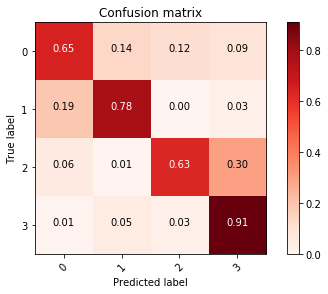

In [13]:
val_confmatrix = confusion_matrix((y_val), predictions)
plot_confusion_matrix(val_confmatrix, range(4), normalize=True)

# Test dataset evaluation
## Evaluation of all windows

In [17]:
loss, accuracy = my_model.evaluate(test_sequences,                                                                                         
                                   y_test_binary_sequences)                                                                                                                                                                                               

print("\nLoss: {} ; Acc: {} on windowed test dataset ".format(loss, accuracy))

3968/4000 [============================>.] - ETA: 0s
Loss: 0.8607607940770685 ; Acc: 0.70275 on windowed test dataset 


## Evaluation averaging among windows

In [15]:
predicted_probabilities = my_model.predict(test_sequences)
y_test, predictions, accuracy = get_full_song_predictions(predicted_probabilities, y_test_binary_sequences)


Accuracy for full songs is 0.7575


Normalized confusion matrix
[[ 0.68  0.18  0.07  0.07]
 [ 0.09  0.87  0.    0.04]
 [ 0.1   0.02  0.63  0.25]
 [ 0.    0.06  0.09  0.85]]


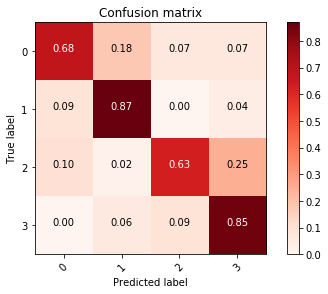

In [18]:
test_confmatrix = confusion_matrix((y_test), predictions)
plot_confusion_matrix(test_confmatrix, range(4), normalize=True)